In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy, binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_dir = '/home/omirako/Documents/Magistrale/Environment/datasets/augmented_classification_images/train_data'
test_dir = '/home/omirako/Documents/Magistrale/Environment/datasets/augmented_classification_images/test_data'
val_dir = '/home/omirako/Documents/Magistrale/Environment/datasets/augmented_classification_images/val_data'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 512

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 36750 images belonging to 21 classes.
Found 10500 images belonging to 21 classes.
Found 5250 images belonging to 21 classes.


In [25]:
#batch_x, batch_y = train_generator.next()
#batch_y[0]

In [26]:
def define_model(initial_input_shape):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu', input_shape=initial_input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten(name='fat_layer'))
    layer = model.get_layer('fat_layer')
    # print('Layer output shape:', layer.output_shape)
    model.add(Dense(128, activation='relu'))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(Dense(21, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    model.summary()

    return model


In [27]:
#input_shape = np.shape(batch_x[0])
input_shape = [128,128,3]
model = define_model(input_shape)
callbacks_es = [EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=True)]

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 12)     │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fat_layer (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,599,953 (6.10 MB)

 Trainable params: 1,599,953 (6.10 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
epochs = 100

rescale = 255.0

with tf.device('/GPU:0'):
    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=epochs,
                        callbacks=callbacks_es)
                        

Epoch 1/100


I0000 00:00:1713198123.680475   45805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1713198123.789192   45803 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 16 bytes spill stores, 32 bytes spill loads

I0000 00:00:1713198123.818486   45789 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 48 bytes spill stores, 64 bytes spill loads

I0000 00:00:1713198124.404470   45785 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_710', 168 bytes spill stores, 144 bytes spill loads

I0000 00:00:1713198124.890882   45787 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_710', 96 bytes spill stores, 96 bytes spill loads

I0000 00:00:1713198124.918517   4

16/72 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.0448 - loss: 0.4104

I0000 00:00:1713198133.315591   45980 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 60 bytes spill stores, 60 bytes spill loads

I0000 00:00:1713198133.520662   45983 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1713198133.559143   45969 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 16 bytes spill stores, 32 bytes spill loads

I0000 00:00:1713198133.659312   45985 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_377', 60 bytes spill stores, 60 bytes spill loads

I0000 00:00:1713198134.784877   45988 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_712', 180 bytes spill stores, 188 bytes spill loads

I0000 00:00:1713198134.922340   459

71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.0492 - loss: 0.2765

I0000 00:00:1713198154.273183   46249 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_82', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1713198154.291961   46246 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_82', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1713198154.340021   46235 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_82', 16 bytes spill stores, 32 bytes spill loads

I0000 00:00:1713198154.373998   46245 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_89', 12 bytes spill stores, 12 bytes spill loads



72/72 ━━━━━━━━━━━━━━━━━━━━ 35s 365ms/step - accuracy: 0.0494 - loss: 0.2749 - val_accuracy: 0.0735 - val_loss: 0.1919
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - accuracy: 0.0783 - loss: 0.1909 - val_accuracy: 0.1375 - val_loss: 0.1837
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 269ms/step - accuracy: 0.1668 - loss: 0.1793 - val_accuracy: 0.2061 - val_loss: 0.1722
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - accuracy: 0.2459 - loss: 0.1647 - val_accuracy: 0.3078 - val_loss: 0.1551
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.3107 - loss: 0.1518 - val_accuracy: 0.3189 - val_loss: 0.1476
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - accuracy: 0.3484 - loss: 0.1427 - val_accuracy: 0.3901 - val_loss: 0.1371
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.4121 - loss: 0.1331 - val_accuracy: 0.4621 - val_loss: 0.1280
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.4686 - loss: 0.1224 - val_accuracy

KeyboardInterrupt: 

In [30]:
accurcy = model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.9117 - loss: 0.0588


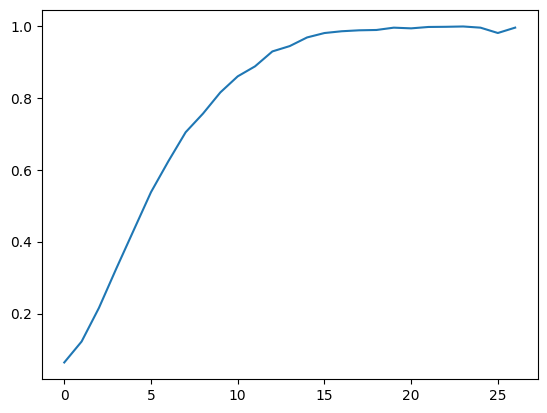

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

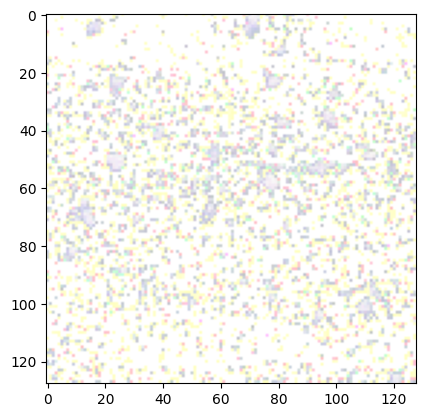

In [54]:
from PIL import Image
 
batch_x, batch_y = test_generator[0]


plt.imshow(image)
plt.show()